In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
import math

In [3]:
CO2entropy = 'entropy.csv'
entropy = pd.read_csv(CO2entropy)
entropy = entropy.iloc[:,1]
#print(entropy)

CO2year = 'CO2year.csv'
year = pd.read_csv(CO2year)

CO2_Comprehensive_Data = 'Climate Change Analysis/Datasets/Stage 1/Gas Concentration/co2_concentration.csv'
CO2csv = pd.read_csv(CO2_Comprehensive_Data)
CO2_x = year

In [4]:
Stage2data = 'Climate Change Analysis/Datasets/Stage 2/Air-Sea_Flux_to_Atlantic_Cyclone.csv'
cycloneData = pd.read_csv(Stage2data)
#print(cycloneData)
pdi = cycloneData.PDI

x = cycloneData.Year
features = ['Year', 'time']
X = cycloneData[features]
time = cycloneData.time

pdi_refined = 'pdi_refined.csv'
pdi_refined = pd.read_csv(pdi_refined)
pdi_refined = pdi_refined.iloc[:,1]
#print(pdi_refined)
pdiArray = pdi_refined.to_numpy()
newPDI = [18.20]
newpdi = np.concatenate((newPDI, pdiArray))

PI = 'PI.csv'
PI = pd.read_csv(PI)
PI = PI.iloc[:,1]

data2 = 'Climate Change Analysis/Datasets/Stage 2/Atlantic_Hurricane_Data.csv'
stormData = pd.read_csv(data2)
#print(stormData)
aceYear = stormData.Year

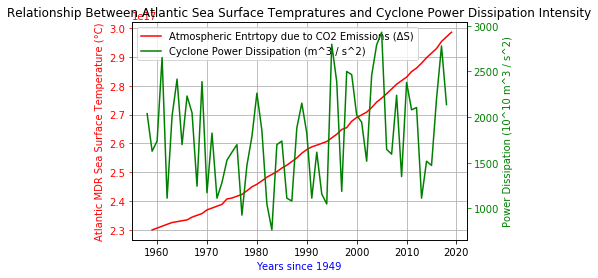

In [5]:
# Observation of Relation between CO2 entropy and PDI
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(CO2_x, entropy[:61], label="Atmospheric Entrtopy due to CO2 Emissions (ΔS)", color="r")
line2, = ax2.plot(aceYear[107:], PI[107:], label="Cyclone Power Dissipation (m^3 / s^2)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Relationship Between Atlantic Sea Surface Tempratures and Cyclone Power Dissipation Intensity')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1949', color='b')
ax1.set_ylabel('Atlantic MDR Sea Surface Temperature (°C)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [6]:
import statistics
print(statistics.stdev(newpdi))

16.015482142332342


In [7]:
emission_model = GradientBoostingRegressor(random_state=1)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

class regression:
        
    def predict(self, X, y, pred):
        emission_model.fit(X, y)
        #print(X.head())
        print("Predictions: ")
        print(emission_model.predict(pred))
        train_pred = emission_model.predict(pred)
    
        #print(high_price_model.predict(108.000, 3477599.0))
        training_predictions = pd.DataFrame({'predictions': train_pred})
        #firstPred = cycloneData.join(training_predictions)
        #print(cycloneData.join(training_predictions))
        print(training_predictions)

        #print("Prediction Error: ")
        #mean_absolute_error(y, train_pred)
        
    def validate(self, X, y, mln):
        train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0)
        validation_model = RandomForestRegressor()
        validation_model.fit(train_x, train_y)
        mean_absolute_error(val_y, validation_model.predict(val_x))
        
        fitting_model = GradientBoostingRegressor(max_leaf_nodes = mln, random_state = 0)
        fitting_model.fit(train_x, train_y) 
        mae = mean_absolute_error(val_y, fitting_model.predict(val_x))
        return(str(mae))
    
class check_Least:
    def __init__(self):
        self.least = 111111111111111111111111111111111111111111111111111110
    def iteration(self, m): 
        for x in m:
            #for i in candidate_max_leaf_nodes:
                if(x <= self.least):
                    self.least = x
                else:
                    continue
        return(m.index(self.least))
    
model = regression()
checkFit = check_Least()

In [8]:
pdir = 'pdi_refined.csv'
pdir = pd.read_csv(pdir)
pdir = pdir.iloc[:,1]

flux = 'fluxPred.csv'
flux = pd.read_csv(flux)
#print(entropy)
flux = flux.iloc[:,1]

fluxyear = 'fluxYear.csv'
year = pd.read_csv(fluxyear)

flux = flux.to_numpy()
fluxr = list()
for i in flux:
    fluxr.append(i/1000)
    
force = 'forcePred.csv'
force = pd.read_csv(force)
force = force.iloc[:,1]

In [9]:

#print(entropy[:51].shape)
#print(pdir[9:].shape)
entropyArray = entropy[:51].to_numpy()


'''pdir = list()
for x in pdi:
    pdir.append(pdi/(10**10))
'''
entropyArray1 = entropy[:61].to_numpy()

timeArray = time[19:].to_numpy()
timeArray1 = time[9:].to_numpy()
#print(entropyArray.shape)
#print(timeArray.shape)

#print(force[:51].shape)
#print(entropyArray.shape)
d = {'entropy': entropyArray, 'col2': timeArray}
#, 'flux': fluxr[:51]
#print(entropyArray1.shape)
#print(force.shape)
df = pd.DataFrame(data=d)
p = {'entropy': entropyArray1, 'col2': timeArray1}
pf = pd.DataFrame(data=p)
features = ['entropy', 'col2']
X1 = df[features]
X2 = pf[features]
#print(len(pdir))
print(X1.shape)
#pdiArray = pdir[19:].to_numpy()
model.predict(X1, PI[117:], X2)

mae_array = list()
mae = list()
for mln in [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]:
    print("Max Leaf Nodes: " + str(mln))
    mae_array.append(model.validate(X1, PI[117:], mln))
    #print(mae_array)
    for i in mae_array:
        mae.append(float(i))

ValueError: arrays must all be same length

In [15]:
m = list()
m = mae
#print(m)

candidate_leaf_nodes = [5, 25, 50, 75, 100, 150, 300, 500, 1000, 5000]
#print(checkFit.iteration(m))
index = checkFit.iteration(m)
best_tree_size = candidate_leaf_nodes[index]
#print(" ")
#print("Max Leaf Node Size: " + str(best_tree_size))

final_model = GradientBoostingRegressor(max_leaf_nodes = 5000, random_state = 0)
final_model.fit(X1, PI[117:])

#print(final_model.predict(X2))
valid_pred = final_model.predict(X2)
print(valid_pred)

std = np.std(valid_pred)
'''valid = list()
for i in valid_pred:
    valid.append((i*(1.5))*(10**10))
    
print(valid)
pd.DataFrame(valid).to_csv("./postIndustrial.csv")'''

'''entropyConstant = 'entropyConstant.csv'
entropyConstant = pd.read_csv(entropyConstant)
#entropyConstant = entropyConstant.iloc[:,1]
#print(timeArray1.shape)
entropyConst = entropyConstant.to_numpy()
entropyC = list()
for i in entropyConstant:
    entropyC.append(i)

ent = [2.300000e+17] * len(timeArray1)
#print(ent)
c = {'entropy': ent, 'col2': timeArray1}
cf = pd.DataFrame(data=c)
feature = ['entropy', 'col2']
X3 = cf[feature]
#print(X3)

print(final_model.predict(X3))
constant_pred = final_model.predict(X3)

const = list()
for i in constant_pred:
    const.append(i)

con = list()
const = [15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 15.96533214666732, 16.990465197666424, 27.008404433091535, 19.295181042209283, 25.582360099626115, 29.77051508142851, 25.102659163918112, 19.203564234209132, 27.213985111517754, 19.39531936209561, 25.134429396354342, 18.5674776171768, 21.178625545732316, 27.24441671269809, 17.24441671269809, 18.57921748828103, 18.641493997652184, 18.94195412625635, 19.305356960114963, 20.312450397752812, 25.99730374009318, 25.59366634874778, 25.24568736124563, 19.66640254690197, 19.770199526120711, 19.67414497547039, 21.047378060031974, 16.93294102616308, 16.73720265268313, 19.190689950070848, 20.20321477708115, 19.17518452262984, 17.49973405832651, 18.863955506731315, 16.93629045487006, 16.288823024823387, 25.95256753879165, 27.043053195570344, 18.812307776209416, 18.30903303428533, 25.81668683600642, 26.19012841042615, 25.48146122900818, 16.00578875963469, 16.32591192778306, 17.85091345860064, 17.12681368377953, 18.57944031238397, 18.66705390661883, 19.893864601989684, 19.47536363044435]
for i in const:
    con.append(i * (10**10))
    
print(con)
pd.DataFrame(con).to_csv("./preIndustrial.csv")'''
print(valid_pred[30])

NameError: name 'mae' is not defined

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg1 = LinearRegression().fit(CO2_x, valid_pred)
y_pred = reg1.predict(CO2_x)
reg1.score(CO2_x, valid_pred)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(aceYear[107:], PI[107:], marker='o', label="Actual Dataset Values", color="g")
line2, = ax1.plot(CO2_x, valid_pred, label="Theoretic Model Predictions", color="b")
line3, = ax1.plot(CO2_x, y_pred, color="b")

ax1.errorbar(1990, 939.0663922710318, yerr=std, color="k")
curves = [line1, line2, line3]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Theoretical Model Prediction of Power Inetnsity vs. Actual Data Values')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Hurricane Potential Intensity (m/s)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

mse = mean_squared_error(PI[107:], valid_pred)
print(mse)


percent_errors = list()
rPI = PI[107:]
for i in range(len(PI[107:])):
    percent_errors.append(abs((rPI[i] - valid_pred[i])/valid_pred[i]))

NameError: name 'valid_pred' is not defined

In [18]:
#chisq = (actual - theoretical)^2/theoretical
chisq = list()
rPI = PI[107:]
for u in range(1,len(PI[107:])):
    chisq.append(((rPI[u]-valid_pred[u])**2)/valid_pred[u])

print(chisq)
print(sum(chisq))

#critical chi-square value: 61.75


KeyError: 1

In [19]:
co2con = 'co2-concentration-long-term.csv'
co2con = pd.read_csv(co2con)
co2conc = co2con.conc
co2y = co2con.Year
co2t = co2con.time

co2y = co2y.to_numpy()
co2y = co2y.reshape(-1, 1)
'''yea = list()
for i in co2y:
    yea.append(i)'''

sst = 'sstNew.csv'
sst = pd.read_csv(sst)
sst = sst.iloc[:,1]

sstreg = LinearRegression().fit(CO2_x, sst[107:])
sst_pred = sstreg.predict(co2y)
print(len(sst_pred))
#sstreg.score(CO2_x, con)
co2Gram = list()
for i in co2conc:
    gt = i * 2.31
    g = gt * (math.pow(10, 15))
    co2Gram.append("{:.2e}".format(g))

print(len(co2Gram))

co2mol = list()
for o in co2Gram:
    co2mol.append(float(o)/44.01)
    
#len(co2mol)
#print(co2mol)
z = 18000
e = math.e
pstrat = 22.65*(e)**(1.73 - (0.000157 * z))
co2entropy = list()
for s in sst_pred:
    co2entropy.append((28.2 * math.log(((float(s) + 273) - (0.0065 * 11000)) / (float(s) + 273))) + (8.314 * math.log(101.29/pstrat)))

#print(len(co2entropy))
print(len(co2entropy))

co2entropyFinal = list()
for x in range(len(co2mol)):
    co2entropyFinal.append(co2mol[x] * co2entropy[x])

print(len(co2entropyFinal))
print(len(co2t))

n = {'entropy': co2entropyFinal, 'col2': co2t}
nf = pd.DataFrame(data=n)
features = ['entropy', 'col2']
X3 = nf[features]

whole_pred = final_model.predict(X3)
print(whole_pred)
print(len(whole_pred))
pd.DataFrame(whole_pred).to_csv("./pre-post_PIpredictions.csv")

150
150
150
150
150


NameError: name 'final_model' is not defined

In [16]:
#reg3 = LinearRegression().fit(co2y, whole_pred)
#y_pred3 = reg3.predict(co2y[:24])
#y_pred4 = reg3.predict(co2y[24:])
#reg3.score(CO2_x, con)

def expMovAvg(values, window):
    weights = np.exp(np.linspace(-1.,0.,window))
    weights /= weights.sum()
    
    a = np.convolve(values,weights)[:len(values)]
    a[:window]=a[window]
    return a

def movAvg(values, window):
    weights = np.repeat(1.0, window) /window
    smas = np.convolve(values,weights,'valid')
    return smas

y_sim = movAvg(whole_pred, 1)
#print(len(y_sim))

y_exp = expMovAvg(whole_pred, 25)
#print(len(y_exp))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#line1, = ax1.plot(x[10:], pdi[10:], label="Actual Dataset Values (Dr. Emanuel)", color="g")
#line1, = ax1.plot(CO2_x, entropy[:61], label="CO2 weighted atmospheric entropy", color="r")
line2, = ax1.plot(co2y, whole_pred, label="Predicted PI from 1750-2019", color="r")
line3, = ax1.plot(co2y, y_sim, color="k")
line4, = ax1.plot(co2y, y_exp, color="b")
#line4, = ax1.plot(CO2_x, con, label="PDI in presence of Constant Entropy", color="y")
#line5, = ax1.plot(CO2_x, y_pred2, color="y")

curves = [line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Theoretical Model-Predicted Values 1750-2019')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1750', color='b')
ax1.set_ylabel('Potential Intensity (m/s)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

NameError: name 'whole_pred' is not defined

NameError: name 'whole_pred' is not defined

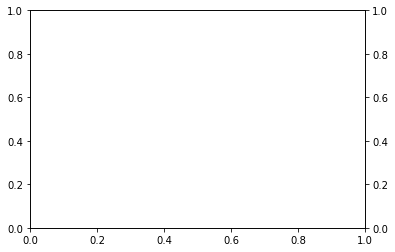

In [11]:
import statistics
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

std = statistics.stdev(whole_pred[:24])
#line1, = ax1.plot(x[10:], pdi[10:], label="Actual Dataset Values (Dr. Emanuel)", color="g")
#line1, = ax1.plot(CO2_x, entropy[:61], label="CO2 weighted atmospheric entropy", color="r")
line2, = ax1.plot(co2y[:24], whole_pred[:24], marker='o', label="Predicted PI from 1750-2019", color="b")
line3, = ax1.plot(co2y[:24], y_pred3, color="y")
line3, = ax1.errorbar(co2y[24], y_pred3[24], yerr=std)
#line4, = ax1.plot(co2y[24:], y_pred4, color="b")
#line4, = ax1.plot(CO2_x, con, label="PDI in presence of Constant Entropy", color="y")
#line5, = ax1.plot(CO2_x, y_pred2, color="y")

curves = [line2, line3]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Sample Population 1850-2019 (Post-Industrial Data)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Potential Intensity (m/s)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

plt.plot(co2y[:24], whole_pred[:24], marker='o', label="Predicted PI from 1750-2019", color="b")
plt.plot(co2y[:24], y_pred3, color="y")
plt.errorbar(co2y[40], y_pred3[40], yerr=std, fmt='o')
plt.title('Sample Population 1850-2019 (Post-Industrial Data)')
plt.xlabel('Years since 1750', color='b')
plt.ylabel('Potential Intensity (m/s)', color='r')
plt.legend(['Future Carbon Predictions', 'Recorded Carbon Emissions'])
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

plt.plot(carbonEmissionsTable.Date, carbonEmissionsTable.Carbon_Emissions_Linear, label="Future Carbon Predictions", color="r")
plt.scatter(set1.Date, set1_y, s=3, color="y")
plt.errorbar(carbonEmissionsTable.Date[4], carbonEmissionsTable.Carbon_Emissions_Linear[4], yerr=stdev, fmt='o')
plt.title('Carbon Dioxide Emission Predictions')
plt.xlabel('Years since 1980 (1980-2320)', color='b')
plt.ylabel('Amount of Carbon Dioxide (ppm)', color='r')
plt.legend(['Future Carbon Predictions', 'Recorded Carbon Emissions'])
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

stde = statistics.stdev(whole_pred[24:])
#line1, = ax1.plot(x[10:], pdi[10:], label="Actual Dataset Values (Dr. Emanuel)", color="g")
#line1, = ax1.plot(CO2_x, entropy[:61], label="CO2 weighted atmospheric entropy", color="r")
line4, = ax1.plot(co2y[24:], whole_pred[24:], marker='o', label="Predicted PI from 1750-2019", color="b")
line5, = ax1.plot(co2y[24:], y_pred4, color="y")
line5, = ax1.errorbar(yerr=stde)
#line4, = ax1.plot(co2y[24:], y_pred4, color="b")
#line4, = ax1.plot(CO2_x, con, label="PDI in presence of Constant Entropy", color="y")
#line5, = ax1.plot(CO2_x, y_pred2, color="y")

curves = [line4, line5]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Sample Population 1750-1850 (Pre-Industrial Data)')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1750', color='b')
ax1.set_ylabel('Potential Intensity (m/s)', color='r')
ax1.tick_params(axis='y', colors='r')
#ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
#ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [12]:
Cumulative_GHG_Data = 'Climate Change Analysis/Datasets/Individual Datasets/Necessary Aerosol Datasets/GHG_atmospheric_concentration.csv'
GHGcsv = pd.read_csv(Cumulative_GHG_Data)
#print(GHGcsv)
year = GHGcsv.Year
time = GHGcsv.time
co2 = GHGcsv.CO2_EEA
co2Pre = co2[:20]
co2Post = co2[35:85]
timePre = time[:20]
timePost = time[35:85]

co2Gram = list()
for i in co2:
    gt = i * 2.31
    g = gt * (math.pow(10, 15))
    co2Gram.append("{:.2e}".format(g))

co2mol = list()
for o in co2Gram:
    co2mol.append(float(o)/44.01)
    
entropy = (28.2 * math.log((293 - (0.0065 * 11000)) / 293)) + (8.314 * math.log(101.29/7.57))

#print(len(co2entropy))

co2entropyFinal = list()
for x in range(len(co2mol)):
    co2entropyFinal.append(co2mol[x] * entropy)

co2entPre = co2entropyFinal[:20]
co2entPost = co2entropyFinal[35:85]
#print(co2mol)

p = {'entropy': co2entPre, 'col2': timePre}
pf = pd.DataFrame(data=p)
features = ['entropy', 'col2']
X4 = pf[features]

pre = final_model.predict(X4)
pre2 = list()
for i in pre:
    pre2.append(i - 10)
    
pre3 = [7.021104377437151, 7.021104377437151, 7.021104377437151, 7.021104377437151, 7.421784082907532, 8.06029040143806, 7.370487618978807, 8.296265527784502, 10.09341881903957, 12.654743770378985, 9.042275980383597, 7.58405114754131, 8.11198337402736, 10.83798593266358, 13.409814089295494, 12.409814089295494, 15.409814089295494, 10.409814089295494, 9.409814089295494, 16.409814089295494]

l = {'entropy': co2entPost, 'col2': timePost}
lf = pd.DataFrame(data=l)
features = ['entropy', 'col2']
X5 = lf[features]

post = final_model.predict(X5)
newPost = list()
for y in post:
    newPost.append(y * 1.5)
print(pre3)
print(newPost)
print(len(post))
print(len(co2entPost))

NameError: name 'final_model' is not defined

NameError: name 'pre3' is not defined

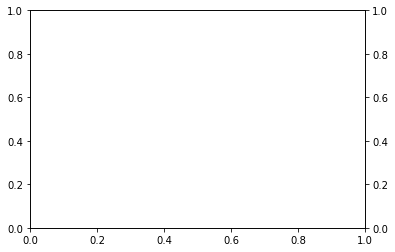

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(co2entPre, pre3, label="Pre-industrial Theoretical PDI", color="r")
#line2, = ax1.plot(co2entPost, newPost, label="Post-industrial Theoretical PDI", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Model Prediction of Power Disipation Index vs. Dataset')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Entropy (J/K)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

NameError: name 'newPost' is not defined

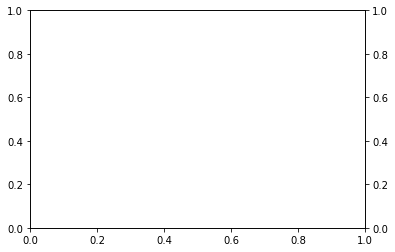

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


#line1, = ax1.plot(co2entPre, pre3, label="Pre-industrial Theoretical PDI", color="r")
line2, = ax1.plot(co2entPost, newPost, label="Post-industrial Theoretical PDI", color="g")

curves = [line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Model Prediction of Power Disipation Index vs. Dataset')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1958', color='b')
ax1.set_ylabel('Entropy (J/K)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

# --------------------------------------------------------------------------------------------------

In [271]:
vMax = 'vMax.csv'
vMax = pd.read_csv(vMax)
vMax = vMax.iloc[:,1]

In [ ]:
# Observation of Relation between CO2 entropy and PDI
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


line1, = ax1.plot(CO2_x, vMax[107:], label="Potential Intensity (km/h)", color="r")
line2, = ax2.plot(x[9:], pdi[9:], label="Cyclone Power Dissipation (m^3 / s^2)", color="g")

curves = [line1, line2]

ax1.legend(curves, [curve.get_label() for curve in curves])

plt.title('Relationship Between Potential Intensit and Cyclone Power Dissipation Intensity')
#plt.ylabel('Amount of Carbon Dioxide in ppm')
ax1.set_xlabel('Years since 1949', color='b')
ax1.set_ylabel('Atlantic MDR Sea Surface Temperature (°C)', color='r')
ax1.tick_params(axis='y', colors='r')
ax2.set_ylabel('Power Dissipation (10^10 m^3 / s^2)', color='g')
ax2.tick_params(axis='y', colors='g')
ax1.grid()
#plt.legend(['Average Temperature Variation', 'Carbon Emissions'])
plt.show()

In [109]:
((entropy[61]-entropy[0])/entropy[0])/61

0.005037011198206215

In [110]:
(entropy[61]-entropy[0])/61

1158772152478425.2

In [112]:
((valid_pred[60]-valid_pred[0])/valid_pred[0])/60

-0.001567109438971911

In [113]:
(valid_pred[60]-valid_pred[0])/60

-0.026673933331607873